<a href="https://colab.research.google.com/github/welitonap/Primeiro/blob/master/CursoProjeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [0]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/file_curso/trainingandtestdata.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall("./")
zip_object.close()

In [0]:
cols = ("sentiment", "id", "date", "query", "user", "text")

In [0]:
train_data = pd.read_csv('/content/trainingandtestdata/train.csv', header=None, names=cols, engine='python', encoding='latin1')

In [0]:
train_data.shape

(1600000, 6)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [0]:
train_data.tail()

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [0]:
train_data.sentiment.unique()

array([0, 4])

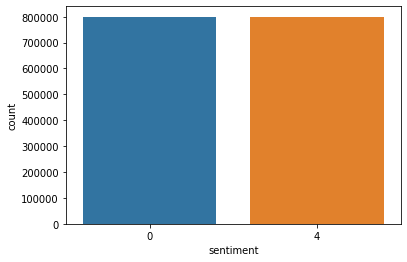

In [0]:
sns.countplot(train_data.sentiment);

In [0]:
test_data = pd.read_csv('/content/trainingandtestdata/test.csv', header = None,
                         names=cols, engine = 'python', encoding = 'latin1')

In [0]:
test_data.head()


,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [0]:
test_data.sentiment.unique

<bound method Series.unique of 0      4
1      4
2      4
3      4
4      4
      ..
493    2
494    0
495    4
496    0
497    0
Name: sentiment, Length: 498, dtype: int64>

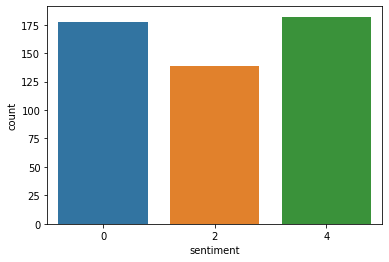

In [0]:
sns.countplot(test_data.sentiment);

In [0]:
data = train_data

In [0]:
data.drop(["id","date","query","user"], axis= 1, inplace=True)

In [0]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [0]:
x = data.iloc[:, 1].values

In [0]:
x

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [0]:
x.shape

(1600000,)

In [0]:
type(x)

numpy.ndarray

In [0]:
y = data.iloc[:, 0].values

In [0]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [0]:
from sklearn.model_selection import train_test_split
x, _, y, _ = train_test_split(x, y, test_size = 0.85, stratify = y)

In [0]:
x.shape
y.shape

unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 4]), array([120000, 120000]))

In [0]:
def clear_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", " ", tweet)
  tweet = re.sub(r"http?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [0]:
text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D"

In [0]:
text = clear_tweets(text)
text

' Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

In [0]:
nlp = sp.load('en')

In [0]:
stop_words = sp.lang.en.STOP_WORDS

In [0]:
print(stop_words)

{'ever', 'anywhere', 'across', 'and', 'yourself', 'anyhow', 'back', 'there', 'everything', 'much', 'otherwise', 'n’t', '’ll', 'made', 'whether', 'five', 'herself', 'whence', 'down', 'hereby', 'n‘t', 'least', 'when', 'nowhere', 'name', 'however', 'very', 'six', 'all', 'via', 'it', 'wherein', 'nevertheless', 'formerly', 'in', 'around', 'over', 'sometimes', 'serious', 'such', 'how', 'behind', 'twelve', 'throughout', 'the', 'fifty', 'other', 'whatever', 'latter', 'just', "'ll", 'amongst', 'below', 'see', 'others', 'next', 'onto', 'them', 'neither', 'eight', 'still', 'me', 'often', 'this', 'whoever', 'keep', 'becoming', 'yours', 'elsewhere', 'is', 'what', 'everyone', 'after', '’ve', 'most', 'more', 'of', '‘re', 'between', 'where', 'every', 'give', 'has', 'somehow', 'against', 'into', 're', 'something', 'who', 'may', 'hundred', 'well', 'together', 'by', 'third', 'they', 'various', 'go', 'three', 'then', 'either', 'even', 'almost', 'i', 'her', 'now', 'own', 'though', 'used', 'until', 'why', '

In [0]:
def clear_tweet2(tweet):
  tweet = tweet.lower()
  document = nlp(tweet)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' ' . join([str(element) for element in words])
  return words


In [0]:
text2 = clear_tweet2(text)
text2

'  awww s bummer shoulda got david carr day d'

In [0]:
data_clear = [clear_tweets(clear_tweets(tweet)) for tweet in x]

In [0]:
for _ in range(10):
  print(data_clear[random.randint(0, len(data_clear) - 1)])

B day Fran! i you friend! n t pcture its isi and me 
Jbird told me I could finally spill the beans to you!!! 
the stink and fly more comfortably thread? 
Enjoying downtown naperville for the last time for a while... 
really want GOW 
Headache. 
I deleted it sorry 
...It s because you have to know!!! Grand Opening of SUITE Saturday Nights in Hollywood... over... ...FLYER 
watching the breakup ... cum cum... on the kick drum... but i missed that part 
Am I sad because I miss the lamest people that just left my house? Unfortunately. No. More. sDot.


In [0]:
data_labels = y

In [0]:
data_labels[data_labels == 4] = 1

In [0]:
data_labels

array([0, 0, 1, ..., 0, 1, 0])

In [0]:
np.unique(data_labels)

array([0, 1])

In [0]:
tokenzer = tfds.features.text.SubwordTextEncoder.build_from_corpus(data_clear, target_vocab_size=2**16)

In [0]:
print(tokenzer.subwords)

['. ', 'I_', 'to_', 'the_', '! ', 'a_', 'i_', 'and_', 'my_', 'you_', 'it_', 'is_', 's_', 'for_', 'in_', 't_', 'of_', 'on_', 'm_', 'that_', 'have_', 'so_', 'me_', 'but_', '? ', 'with_', 'be_', '... ', 'at_', 'was_', 'just_', 'not_', '...', 'can_', 'this_', 'get_', 'like_', 'up_', 'are_', 'all_', 'out_', 'go_', 'good_', 'day_', 'your_', '!! ', '.. ', 'now_', 'do_', 'from_', 'got_', 'no_', 'going_', 'love_', 'we_', 'am_', 'work_', 'u_', 'about_', 'will_', 'back_', 'know_', 'don_', 'what_', 'some_', 'one_', 'really_', 'had_', 'time_', 'see_', 'too_', 'll_', 'want_', 'im_', 'It_', 'as_', 'today_', 'its_', 'think_', 'it', 'still_', 're_', 'when_', 'they_', 'if_', '!!! ', 'new_', 'an_', 'how_', 'more_', 'miss_', 'need_', 'last_', 'there_', 'been_', 'or_', 'he_', 'has_', 'My_', 'off_', 'much_', ' . ', 'night_', 'feel_', 'me', 'The_', 'you', 'home_', 've_', 'then_', '..', 'Just_', 'her_', 'well_', 'You_', 'here_', 'would_', 'today', 'now', 'hope_', 'great_', 'only_', 'd_', 'by_', 'very_', 'make

In [0]:
ids = tokenzer.encode('i am happy')

In [0]:
ids

[7, 55, 956]

In [0]:
text = tokenzer.decode([7,56,850])
text

'i we shower '

In [0]:
data_inputs = [tokenzer.encode(sentence) for sentence in data_clear]

In [0]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[61302, 193, 15517, 2884]
[12033, 5, 2, 21, 178, 95, 3, 8199, 1, 269, 10, 95, 3, 28843, 3490, 67990]
[43, 143, 3, 10, 77, 343, 5, 1145, 78, 55, 113]
[638, 57, 18, 2908, 9, 1960, 11170, 205, 8722, 6786, 68042]
[357, 138, 61, 14, 6, 4267, 5, 67493, 12, 246, 2607, 431, 572, 5]
[185, 7, 335, 15, 7782]
[2, 128, 2249, 9, 2, 71, 4, 278, 57, 2510, 22, 56, 147, 70, 1001, 276, 435, 680, 9, 6, 1353, 27]
[629, 13, 43108, 3, 650, 25831, 151, 3583, 259, 1, 4783, 53613, 56844, 610, 1]
[114, 3871, 52, 6, 530, 29, 1030, 3, 49, 37205, 3197, 6770, 7, 31, 92, 15140, 202]
[12, 216, 18, 8594, 3204, 6991, 110, 11409, 9, 174, 67026, 65092, 1, 159, 44]


In [0]:
max_len = max(len(sentence) for sentence in data_inputs)
max_len

72

In [0]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen = max_len)

In [0]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[    2    34  1898   153    14     4 23384 67959    88    17   497  5596
     1   180  2913    33   447   572    27     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[5350    7  267    7   30   45   54    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[3455   11   15 9055 3455   11   15    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [0]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [0]:
train_inputs[0]
train_inputs[2]

array([  137,  8462,  7566, 23118,  2296,   205,  1106,    41, 51018,
       67959,   163,   149,     5,    22,   379,     3,   287,    41,
          89,    81, 10540,   173,     8,  2500,   106,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [0]:
train_labels.shape

(168000,)

In [0]:
train_inputs.shape

(168000, 72)

In [0]:
test_inputs.shape

(72000, 72)

In [0]:
test_labels.shape

(72000,)

In [0]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Etapa 4: Treinamento

### Configuração dos parâmetros

In [0]:
vocab_size = tokenzer.vocab_size
vocab_size

68183

In [0]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [0]:
dropout_rate = 0.2
nb_epochs = 5

## Treinamento



In [0]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [0]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored')

In [0]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
ckpt_manager.save()

#Etapa 5: Avaliação do modelo

In [0]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=size)
print(result)

In [0]:
y_pred_test = Dcnn.predict(test_inputs)
y_pred_test

## Avaliação

##Previsões